In [1]:
from normalize import load_data, normalize_data
from clustering import reduce_dimension, perform_clustering
from visualization import plot_clusters
from differential_expression import differential_expression
from GSEA import run_gsea_analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data = load_data('GSE69405_PROCESSED_GENE_TPM_ALL_ready.txt')
data = pd.DataFrame(data)
print(data.shape)
data.head()

(57820, 201)


,H358_Pooled,H358_SC05,H358_SC09,H358_SC10,H358_SC11,H358_SC12,H358_SC14,H358_SC16,H358_SC17,H358_SC18,...,LC-MBT-15_SC87,LC-MBT-15_SC89,LC-MBT-15_SC92,LC-MBT-15_SC94,LC-MBT-15_SC95,LC-MBT-15_SC96,LC-PT-45-mock,LC-PT-45-Selumetinib_R0,LC-PT-45-Selumetinib_R3,LC-PT-45-Selumetinib_R7
gene_name,,,,,,,,,,,,,,,,,,,,,
RP1-67K17.4,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
OR5BE1P,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
MIR3179-3,5.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.59,0.0,1.62
TTTY2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
RPS12P26,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.00,0.0,0.00


In [3]:
# Skip 1. Normalization
# data_norm = normalize_data(data)
# print(data_norm.shape)
# data_norm.head()
data_norm = data

In [4]:
# 2. Clustering
tsne_result = reduce_dimension(data_norm)
kmeans = perform_clustering(tsne_result)

E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
kmeans

KMeans(n_clusters=10, random_state=0)

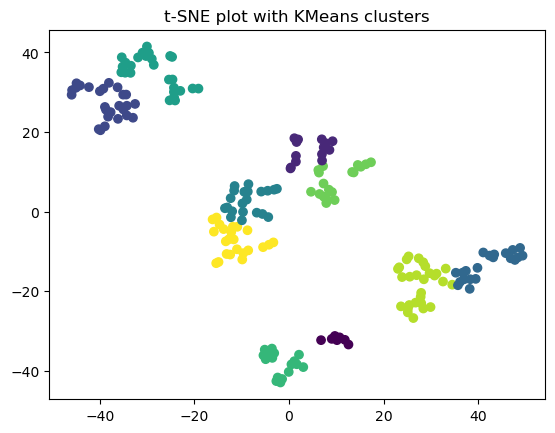

In [6]:
# 3. Visualization
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('t-SNE plot with KMeans clusters')
handles, labels = scatter.legend_elements()
plt.show()

In [7]:
print('before DEG data norm', data_norm.isna().sum().sum())
ttest_results, controldata, casedata, significant_gene_and_expression = differential_expression(data_norm, kmeans)
print(controldata.shape, casedata.shape)

before DEG data norm 0
(57820, 7) (57820, 14)


In [8]:
# 4. Differential Analysis
t_stat, pvalues = ttest_results 
print(t_stat.shape)
gene_list = data_norm.index.tolist()
significant_gene = [gene for gene, pvalue in zip(gene_list, pvalues) if pvalue < 0.05]

(57820,)


<Axes: ylabel='gene_name'>

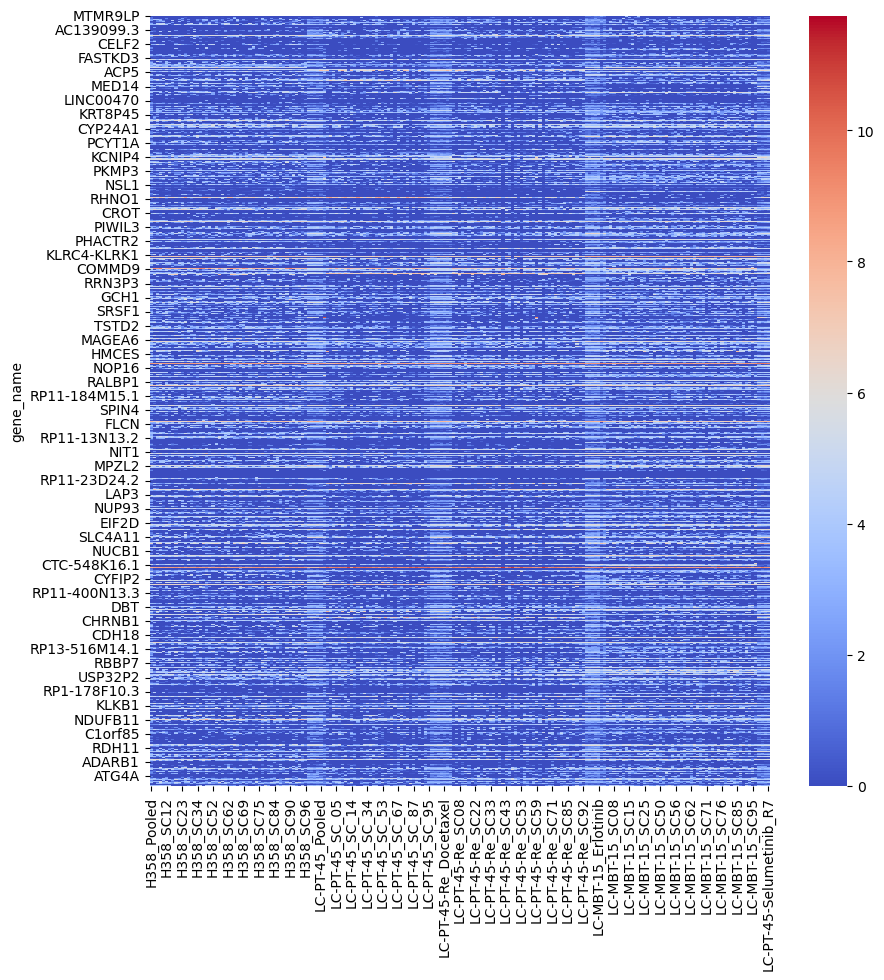

In [9]:
# 4.5 Differential Analysis Visualization
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(significant_gene_and_expression, cmap='coolwarm') ## cmap = 'viridis'

In [25]:
print(len(significant_gene))

8334


In [11]:
# 5. GSEA
stream, df = run_gsea_analysis(significant_gene, 'pathway_with_pvalues.csv')
print("pathway p-value", df)

pathway p-value                                                Pathway   P-value
0                     Herpes simplex virus 1 infection  4.959018
1                                           Peroxisome  4.162316
2                                      DNA replication  3.181983
3                            Citrate cycle (TCA cycle)  2.908207
4                                 Steroid biosynthesis  2.900249
..                                                 ...       ...
315  Viral protein interaction with cytokine and cy...  0.000002
316                                           Ribosome  0.000002
317                       Systemic lupus erythematosus  0.000002
318                   Protein digestion and absorption  0.000002
319                                 Taste transduction  0.000002

[320 rows x 2 columns]


C:\Users\malinda\AppData\Local\Temp\ipykernel_6372\4127600696.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_10))


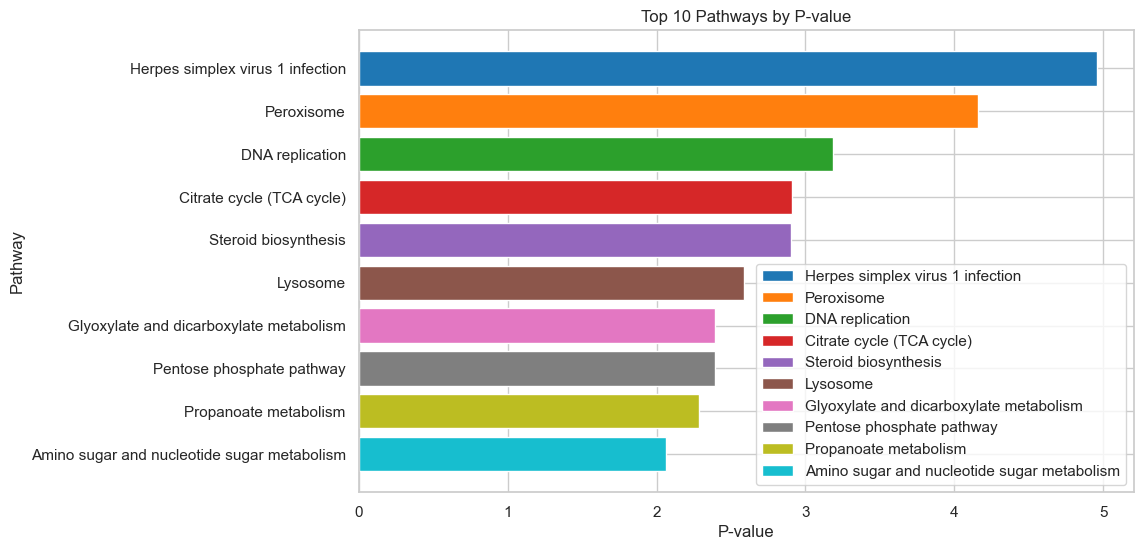

In [12]:
# Read the CSV file into a DataFrame
# Sort the DataFrame by the second column (p-value) in descending order
df_sorted = df.sort_values(by=df.columns[1], ascending=False)

# Select the top 10 rows
top_10 = df_sorted.head(10)

# Define colors for the bars
colors = plt.cm.get_cmap('tab10', len(top_10))

# Plot the graph
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10[df.columns[0]], top_10[df.columns[1]], color=colors(np.arange(len(top_10))))

plt.xlabel('P-value')
plt.ylabel('Pathway')
plt.title('Top 10 Pathways by P-value')
plt.gca().invert_yaxis()

# Add legend showing the pathway names and their corresponding colors
legend_labels = top_10[df.columns[0]]
plt.legend(bars, legend_labels, loc='lower right')

plt.show()

In [ ]:
# Congratulations! Completed!